##### インストール

In [2]:
!pip3 install blueqat

     |████████████████████████████████| 53 kB 32 kB/s eta 0:00:01:01
You should consider upgrading via the '/Users/humu/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip3 install blueqat

In [5]:
from blueqat import Circuit
import math

#number of qubit is not specified
c1 = Circuit()

#if you want to specified the number of qubit
c2 = Circuit(3) #3qubits
print(c1)
print(c2)

Circuit(0).
Circuit(3).


In [6]:
# write as chain
print(Circuit().h[0].x[0].z[0])

Circuit(1).h[0].x[0].z[0]


In [7]:
vars(c2)

{'ops': [], '_backends': {}, '_default_backend': None, 'n_qubits': 3}

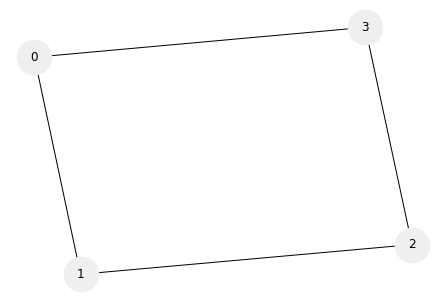

In [84]:
import networkx as nx
import matplotlib.pyplot as plt

options = {'node_color': '#efefef','node_size': 1200,'with_labels':'True'}

G = nx.Graph()
G.add_nodes_from([0,1,2,3])
G.add_edges_from([(0,1),(0,3),(1,2),(2,3)])
nx.draw(G, **options)

In [9]:
!pip install -U blueqat

Requirement already up-to-date: blueqat in ./opt/anaconda3/lib/python3.7/site-packages (0.3.17)


In [10]:
import blueqat.opt as wq
import numpy as np
a = wq.opt()
a.J = [[0,0.5,0,0.5,0],[0,0,0.5,0,0],[0,0,0,0.5,0.5],[0,0,0,0,0.5],[0,0,0,0,0]]
a.sa()


[0, 1, 0, 1, 0]

In [88]:

'''
blueqat.opt python base 量子アニーリング型 SDK
※ QUBO：Quadratic Unconstrained Binary Optimization （二次制約なし二値最適化）の行列を使ってマシンにかける
QUBOorイジリングを使用
sa→シミュレーテッドアニーリングの略で、温度を使ったアルゴリズムで
'''

from blueqat.opt import Opt
c = Opt().add("(2*q0-1)*(2*q1-1)+(2*q0-1)*(2*q3-1)+(2*q1-1)*(2*q2-1)+(2*q2-1)*(2*q3-1)")
print(c.run())

[1, 0, 1, 0]


In [89]:
vars(c)

{'Ts': 5,
 'Tf': 0.02,
 'R': 0.95,
 'ite': 1000,
 'qubo': array([[-4.,  4.,  0.,  4.],
        [ 0., -4.,  4.,  0.],
        [ 0.,  0., -4.,  4.],
        [ 0.,  0.,  0., -4.]]),
 'J': array([[0., 1., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 0.]]),
 'ep': -4.0,
 'E': [-4.0,
  -4.0,
  -8.0,
  -8.0,
  -8.0,
  -8.0,
  -4.0,
  -4.0,
  -8.0,
  -8.0,
  -8.0,
  -8.0,
  -8.0,
  -8.0,
  -8.0,
  -8.0,
  -8.0,
  -8.0,
  -8.0,
  -8.0,
  -8.0],
 'dwaveendpoint': 'https://cloud.dwavesys.com/sapi',
 'dwavetoken': '',
 'dwavesolver': 'DW_2000Q_VFYC_5'}

In [17]:
import blueqat.opt as wq
a = wq.opt()
a.qubo = [[4,-4,-4],[0,4,-4],[0,0,4]]
a.sa() #=> array([1, 1, 1])

[0, 0, 0]

In [19]:
from blueqat import Circuit
from blueqat import vqe
from blueqat.pauli import qubo_bit as q

#The entanglement of 2qubits
Circuit().h[0].cx[0,1].m[:].run(shots=100)

#The quantum-classical hybrid algorithm to find eigenvalue of matrix
hamiltonian = -3*q(0)-3*q(1)+2*q(0)*q(1)
result = vqe.Vqe(vqe.QaoaAnsatz(hamiltonian, step=2)).run()
print(result.most_common(12))

(((1, 1), 0.9397285397592132), ((1, 0), 0.02764876797238268), ((0, 1), 0.027648767972382637), ((0, 0), 0.004973924296021115))


In [83]:
from blueqat import pauli, vqe

def maxcut_qaoa(n_step, edges, minimizer=None, sampler=None, verbose=True):
    """Setup QAOA.
    :param n_step: The number of step of QAOA
    :param n_sample: The number of sampling time of each measurement in VQE.
                     If None, use calculated ideal value.
    :param edges: The edges list of the graph.
    :returns Vqe object
    """
    sampler = sampler or vqe.non_sampling_sampler
    minimizer = minimizer or vqe.get_scipy_minimizer(
        method="Powell",
        options={"ftol": 5.0e-2, "xtol": 5.0e-2, "maxiter": 1000, "disp": True}
    )
    hamiltonian = pauli.I() * 0

    for i, j in edges:
        hamiltonian += pauli.Z(i) * pauli.Z(j)

    return vqe.Vqe(vqe.QaoaAnsatz(hamiltonian, n_step), minimizer, sampler)

if __name__ == "__main__":
    runner = maxcut_qaoa(2, [(0,1),(0,3),(1,2),(2,3)])
    result = runner.run()
    print("""
     {0}---{3}
     | x |
     {1}---{2}
""".format(*result.most_common()[0][0]))

Optimization terminated successfully.
         Current function value: -3.146176
         Iterations: 2
         Function evaluations: 60

     1---0
     | x |
     0---1



In [26]:
!pip install cvxopt picos networkx

     |████████████████████████████████| 3.1 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 237 kB 2.1 MB/s eta 0:00:01
  Created wheel for picos: filename=PICOS-2.0.8-py3-none-any.whl size=321333 sha256=6d6ada99ee94a70d2e8cc0c7e7a4635e4c073b59845069a3eb7be06919467484
  Stored in directory: /Users/humu/Library/Caches/pip/wheels/47/21/14/8aa68a4d6b6f39266b66cb8c92c2ddbcbb8e657a447a527246
Successfully built picos


In [50]:
import cvxopt as cvx
import picos as pic
from picos.tools import diag_vect
import cvxopt .lapack
import numpy as np
import networkx as nx

G=nx.Graph()

G.add_edge('1','2',weight=1)
G.add_edge('1','3',weight=2)
G.add_edge('1','4',weight=1)
G.add_edge('1','5',weight=3)
G.add_edge('2','3',weight=2)
G.add_edge('2','5',weight=3)
G.add_edge('3','4',weight=2)
G.add_edge('3','5',weight=4)
G.add_edge('4','5',weight=1)

N=G.number_of_nodes()
maxcut = pic.Problem()
X = maxcut.add_variable('x',(N,N),'symmetric')
nlist = ['1','2','3','4','5']

gL = nx.laplacian_matrix(G,weight='weight',nodelist=nlist)
gL = gL.toarray().astype(np.double)
L = pic.new_param('L',1/4.*gL)

maxcut.add_constraint(diag_vect(X)==1)
maxcut.add_constraint(X>>0)
maxcut.set_objective('max',L|X)
maxcut.solve()



/Users/humu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: Problem.add_variable is deprecated: Variables can now be created independent of problems, and do not need to be added to any problem explicitly.
/Users/humu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: new_param is deprecated: Use Constant instead.
/Users/humu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: diag_vect is deprecated: Use maindiag instead.


<primal feasible solution pair (claimed optimal) from cvxopt>

/Users/humu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: new_param is deprecated: Use Constant instead.
/Users/humu/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/humu/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


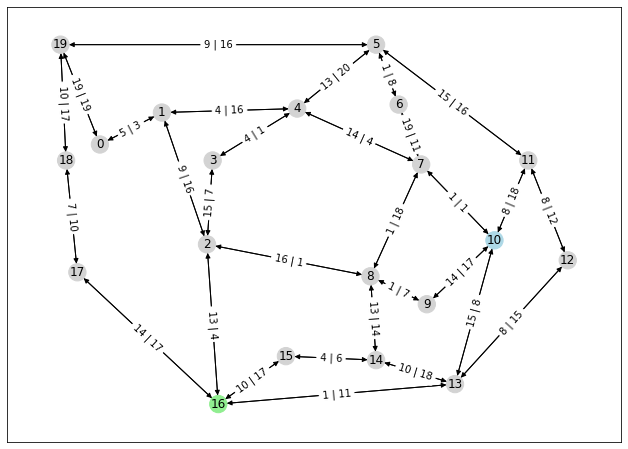

In [64]:
import picos as pic
import networkx as nx
import pylab
import random

# Use a fixed RNG seed so the result is reproducable.
random.seed(1)

# Number of nodes.
N=20

# Generate a graph using LCF notation.
G=nx.LCF_graph(N,[1,3,14],5)
G=nx.DiGraph(G) #edges are bidirected

# Generate edge capacities.
c={}
for e in sorted(G.edges(data=True)):
  capacity = random.randint(1, 20)
  e[2]['capacity'] = capacity
  c[(e[0], e[1])]  = capacity

# Convert the capacities to a PICOS expression.
cc=pic.new_param('c',c)

# Manually set a layout for which the graph is planar.
pos={
  0:  (0.07, 0.70), 1:  (0.18, 0.78), 2:  (0.26, 0.45), 3:  (0.27, 0.66),
  4:  (0.42, 0.79), 5:  (0.56, 0.95), 6:  (0.60, 0.80), 7:  (0.64, 0.65),
  8:  (0.55, 0.37), 9:  (0.65, 0.30), 10: (0.77, 0.46), 11: (0.83, 0.66),
  12: (0.90, 0.41), 13: (0.70, 0.10), 14: (0.56, 0.16), 15: (0.40, 0.17),
  16: (0.28, 0.05), 17: (0.03, 0.38), 18: (0.01, 0.66), 19: (0.00, 0.95)
}

# Set source and sink nodes for flow computation.
s=16
t=10

# Set node colors.
node_colors=['lightgrey']*N
node_colors[s]='lightgreen' # Source is green.
node_colors[t]='lightblue'  # Sink is blue.

# Define a plotting helper that closes the old and opens a new figure.
def new_figure():
  try:
    global fig
    pylab.close(fig)
  except NameError:
    pass
  fig=pylab.figure(figsize=(11,8))
  fig.gca().axes.get_xaxis().set_ticks([])
  fig.gca().axes.get_yaxis().set_ticks([])

# Plot the graph with the edge capacities.
new_figure()
nx.draw_networkx(G, pos, node_color=node_colors)
labels={
  e: '{} | {}'.format(c[(e[0], e[1])], c[(e[1], e[0])])
  for e in G.edges if e[0] < e[1]}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
pylab.show()

/Users/humu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: new_param is deprecated: Use Constant instead.
/Users/humu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: DeprecationWarning: Problem.add_variable is deprecated: Variables can now be created independent of problems, and do not need to be added to any problem explicitly.
/Users/humu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: DeprecationWarning: new_param is deprecated: Use Constant instead.
/Users/humu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: DeprecationWarning: diag_vect is deprecated: Use maindiag instead.
/Users/humu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: Problem.obj_value is deprecated: Use value instead.
/Users/humu/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Ma

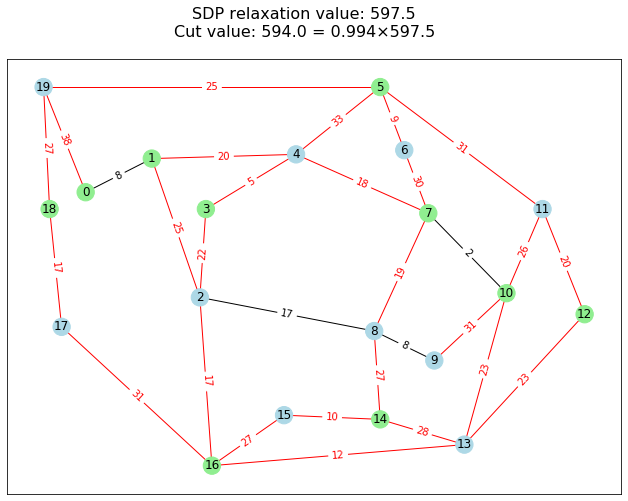

In [91]:
import cvxopt as cvx
import cvxopt.lapack
import numpy as np
import picos as pic
import networkx as nx
import pylab
import random

# Use a fixed RNG seed so the result is reproducable.
random.seed(1)

# Number of nodes.
N=20

# Generate a graph using LCF notation.
G=nx.LCF_graph(N,[1,3,14],5)
G=nx.DiGraph(G) #edges are bidirected

# Generate edge capacities.
c={}
for e in sorted(G.edges(data=True)):
  capacity = random.randint(1, 20)
  e[2]['capacity'] = capacity
  c[(e[0], e[1])]  = capacity

# Convert the capacities to a PICOS expression.
cc=pic.new_param('c',c)

# Manually set a layout for which the graph is planar.
pos={
  0:  (0.07, 0.70), 1:  (0.18, 0.78), 2:  (0.26, 0.45), 3:  (0.27, 0.66),
  4:  (0.42, 0.79), 5:  (0.56, 0.95), 6:  (0.60, 0.80), 7:  (0.64, 0.65),
  8:  (0.55, 0.37), 9:  (0.65, 0.30), 10: (0.77, 0.46), 11: (0.83, 0.66),
  12: (0.90, 0.41), 13: (0.70, 0.10), 14: (0.56, 0.16), 15: (0.40, 0.17),
  16: (0.28, 0.05), 17: (0.03, 0.38), 18: (0.01, 0.66), 19: (0.00, 0.95)
}

# Set source and sink nodes for flow computation.
s=16
t=10

# Set node colors.
node_colors=['lightgrey']*N
node_colors[s]='lightgreen' # Source is green.
node_colors[t]='lightblue'  # Sink is blue.

# Define a plotting helper that closes the old and opens a new figure.
def new_figure():
  try:
    global fig
    pylab.close(fig)
  except NameError:
    pass
  fig=pylab.figure(figsize=(11,8))
  fig.gca().axes.get_xaxis().set_ticks([])
  fig.gca().axes.get_yaxis().set_ticks([])


# Make G undirected.
G=nx.Graph(G)

# Allocate weights to the edges.
for (i,j) in G.edges():
  G[i][j]['weight']=c[i,j]+c[j,i]

maxcut = pic.Problem()

# Add the symmetric matrix variable.
X=maxcut.add_variable('X', (N,N), 'symmetric')

# Retrieve the Laplacian of the graph.
LL = 1/4.*nx.laplacian_matrix(G).todense()
L=pic.new_param('L', LL)

# Constrain X to have ones on the diagonal.
maxcut.add_constraint(pic.diag_vect(X) == 1)

# Constrain X to be positive semidefinite.
maxcut.add_constraint(X >> 0)

# Set the objective.
maxcut.set_objective('max', L|X)

#print(maxcut)

# Solve the problem.
maxcut.solve(solver='cvxopt')

#print('bound from the SDP relaxation: {0}'.format(maxcut.obj_value()))

# Use a fixed RNG seed so the result is reproducable.
cvx.setseed(1)

# Perform a Cholesky factorization.
V=X.value
cvxopt.lapack.potrf(V)
for i in range(N):
  for j in range(i+1,N):
    V[i,j]=0

# Do up to 100 projections. Stop if we are within a factor 0.878 of the SDP
# optimal value.
count=0
obj_sdp=maxcut.obj_value()
obj=0
while (count < 100 or obj < 0.878*obj_sdp):
  r=cvx.normal(20,1)
  x=cvx.matrix(np.sign(V*r))
  o=(x.T*L*x).value
  if o > obj:
    x_cut=x
    obj=o
  count+=1
x=x_cut

# Extract the cut and the seperated node sets.
S1=[n for n in range(N) if x[n]<0]
S2=[n for n in range(N) if x[n]>0]
cut = [(i,j) for (i,j) in G.edges() if x[i]*x[j]<0]
leave = [e for e in G.edges if e not in cut]

# Close the old figure and open a new one.
new_figure()

# Assign colors based on set membership.
node_colors=[('lightgreen' if n in S1 else 'lightblue') for n in range(N)]

# Draw the nodes and the edges that are not in the cut.
nx.draw_networkx(G, pos, node_color=node_colors, edgelist=leave)
labels={e: '{}'.format(G[e[0]][e[1]]['weight']) for e in leave}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Draw the edges that are in the cut.
nx.draw_networkx_edges(G, pos, edgelist=cut, edge_color='r')
labels={e: '{}'.format(G[e[0]][e[1]]['weight']) for e in cut}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='r')

# Show the relaxation optimum value and the cut capacity.
rval = maxcut.obj_value()
sval = sum(G[e[0]][e[1]]['weight'] for e in cut)
fig.suptitle(
  'SDP relaxation value: {0:.1f}\nCut value: {1:.1f} = {2:.3f}×{0:.1f}'
  .format(rval, sval, sval/rval), fontsize=16, y=0.97)

# Show the figure.
pylab.show()


In [68]:
vars(G)

{'graph_attr_dict_factory': dict,
 'node_dict_factory': dict,
 'node_attr_dict_factory': dict,
 'adjlist_outer_dict_factory': dict,
 'adjlist_inner_dict_factory': dict,
 'edge_attr_dict_factory': dict,
 'graph': {'name': 'LCF_graph'},
 '_node': {0: {},
  1: {},
  2: {},
  3: {},
  4: {},
  5: {},
  6: {},
  7: {},
  8: {},
  9: {},
  10: {},
  11: {},
  12: {},
  13: {},
  14: {},
  15: {},
  16: {},
  17: {},
  18: {},
  19: {}},
 '_adj': {0: {1: {'capacity': 3, 'weight': 8},
   19: {'capacity': 19, 'weight': 38}},
  1: {0: {'capacity': 3, 'weight': 8},
   2: {'capacity': 16, 'weight': 25},
   4: {'capacity': 16, 'weight': 20}},
  2: {1: {'capacity': 16, 'weight': 25},
   3: {'capacity': 7, 'weight': 22},
   16: {'capacity': 4, 'weight': 17},
   8: {'capacity': 1, 'weight': 17}},
  3: {2: {'capacity': 7, 'weight': 22}, 4: {'capacity': 1, 'weight': 5}},
  4: {1: {'capacity': 16, 'weight': 20},
   3: {'capacity': 1, 'weight': 5},
   5: {'capacity': 20, 'weight': 33},
   7: {'capacity': 

In [69]:
!jt -r

/bin/sh: jt: command not found


In [74]:
from blueqat import Circuit
import numpy as np
from scipy.optimize import minimize

n=4
graph=[(0,1),(0,3),(1,2),(2,3)]

def U_C(state,gamma):
 for edge in graph:
  j=edge[0]
  k=edge[1]
  state.cx[j,k]
  state.rz(gamma)[k]
  state.cx[j,k]

def U_B(state,beta):
 for i in range(n):
  state.rx(beta*2)[i]

def state_preparation(state,gamma,beta):
 state.h[:]
 for i in range(steps):
  U_C(state,gamma[i])
  U_B(state,beta[i])
 return state

def exp_val(state,edge):
 shots=1000
 c=state.run(shots=shots)
 expval=0
 for i in c:
  if (i[edge[0]]=='0' and i[edge[1]]=='0') or (i[edge[0]]=='1' and i[edge[1]]=='1'):
   expval+=c[i]/shots
   
  else:
   expval-=c[i]/shots
    
 return expval

def max_cut(params):
 gamma=[]
 beta=[]
 for i in range(len(params)):
  if i%2==0:
   gamma.append(params[i])
  else:
   beta.append(params[i])
 state=Circuit(n)
 circ=state_preparation(state,gamma,beta)
 circ.m[:]
 print(circ.run(shots=1000))
 obj=0
 for edge in graph:
  obj=obj - 0.5 * (1 - exp_val(circ,edge))
 return obj

steps=2
init_params = 0.01 * np.random.rand(2,2)
tol_val=1e-2 # The tolerance value for the optimization procedure
result=minimize(max_cut,init_params, method="Powell" , tol=tol_val)
print(f'The Objective after optimization is {-result.fun}')

Counter({'1110': 78, '0110': 73, '1010': 72, '0001': 68, '0111': 67, '1101': 63, '0010': 62, '0101': 62, '1001': 61, '1000': 61, '0011': 57, '1100': 57, '1111': 57, '1011': 57, '0000': 56, '0100': 49})
Counter({'0100': 77, '0000': 74, '1110': 69, '1101': 68, '0011': 66, '0010': 65, '1010': 65, '1100': 64, '0101': 63, '1000': 61, '1111': 59, '1011': 58, '0111': 55, '0110': 55, '1001': 52, '0001': 49})
Counter({'0000': 79, '0110': 69, '0101': 69, '1011': 67, '1111': 66, '1101': 66, '1001': 65, '0001': 64, '1000': 63, '1110': 61, '1100': 60, '1010': 60, '0010': 57, '0011': 52, '0100': 51, '0111': 51})
Counter({'0011': 72, '1010': 71, '1000': 71, '1110': 71, '1011': 67, '0010': 67, '1111': 66, '1001': 66, '0001': 61, '1101': 60, '0110': 59, '0111': 58, '0101': 56, '0000': 55, '0100': 53, '1100': 47})
Counter({'1000': 87, '0101': 75, '1111': 68, '1010': 65, '0011': 64, '0100': 63, '1001': 63, '1101': 62, '0001': 60, '1100': 59, '1011': 58, '0000': 58, '0111': 56, '0010': 56, '1110': 55, '01

Counter({'1111': 284, '0000': 280, '1101': 42, '0111': 41, '1000': 39, '1011': 37, '0001': 34, '1100': 33, '0010': 33, '0100': 31, '1110': 28, '0101': 27, '1001': 25, '1010': 24, '0011': 24, '0110': 18})
Counter({'1010': 490, '0101': 463, '1110': 10, '0111': 6, '1101': 6, '0010': 5, '1011': 4, '0100': 4, '0110': 4, '0001': 4, '1001': 2, '1000': 1, '0011': 1})
Counter({'0101': 320, '1010': 299, '0110': 48, '0011': 44, '1100': 38, '1001': 30, '1110': 26, '0000': 26, '1000': 25, '1011': 22, '0111': 22, '0010': 21, '0001': 21, '1111': 20, '1101': 20, '0100': 18})
Counter({'0101': 358, '1010': 349, '1011': 35, '0100': 34, '0001': 34, '0111': 33, '0010': 32, '1110': 27, '1000': 24, '1101': 23, '1111': 15, '0000': 13, '1001': 9, '0110': 6, '0011': 4, '1100': 4})
Counter({'0101': 492, '1010': 482, '0110': 6, '0011': 4, '1101': 4, '0010': 2, '1100': 2, '1011': 2, '0111': 2, '1001': 1, '1110': 1, '0001': 1, '0100': 1})
Counter({'1010': 486, '0101': 474, '0110': 10, '0011': 8, '1100': 5, '1110': 

Counter({'0101': 508, '1010': 475, '0111': 5, '1110': 3, '0100': 2, '1101': 2, '1000': 2, '0010': 1, '1011': 1, '0001': 1})
Counter({'1111': 157, '0000': 150, '1010': 108, '0101': 92, '1110': 59, '1101': 50, '1000': 47, '0010': 46, '0100': 44, '0111': 43, '1011': 36, '0001': 35, '0011': 35, '0110': 33, '1001': 33, '1100': 32})
Counter({'1111': 337, '0000': 285, '0001': 35, '0010': 34, '0110': 33, '1110': 32, '1011': 32, '1000': 31, '0111': 28, '1101': 27, '1100': 24, '0011': 23, '1001': 21, '1010': 21, '0100': 21, '0101': 16})
Counter({'1010': 497, '0101': 487, '0001': 3, '1110': 3, '0111': 3, '0010': 2, '0100': 2, '1011': 1, '1101': 1, '1000': 1})
Counter({'1010': 248, '0101': 241, '0111': 52, '0010': 49, '0000': 45, '0011': 41, '1110': 37, '1101': 36, '1011': 35, '1100': 33, '0110': 33, '1111': 33, '1001': 31, '0001': 31, '0100': 31, '1000': 24})
Counter({'0101': 406, '1010': 400, '1110': 32, '1011': 27, '0100': 25, '0111': 18, '0010': 15, '0011': 13, '1100': 12, '0110': 11, '1000': 

In [90]:
pip install dwave-cloud-client

     |████████████████████████████████| 83 kB 21 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
